<a href="https://colab.research.google.com/github/OguzCanTosun/Python-Projects/blob/main/Python_ile_Banka_Uygulamas%C4%B1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Eğitim

Mounted at /content/drive


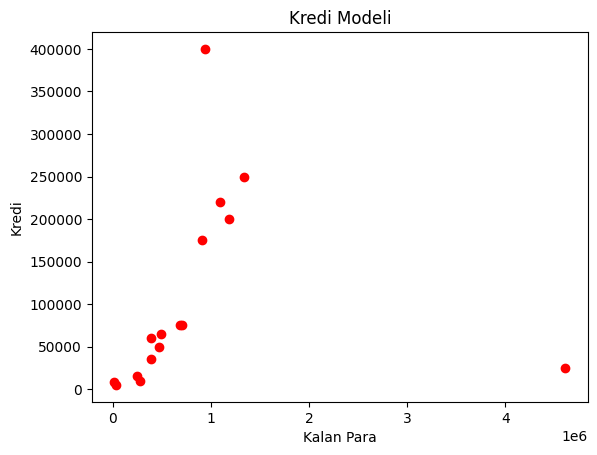

MSE hata skoru:  5587925799.8268795
Katsayı:  [0.0131227]
Kesişim Noktası:  92920.39990514875


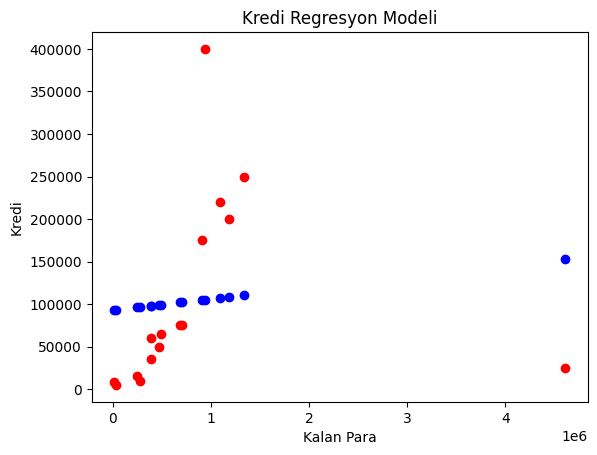

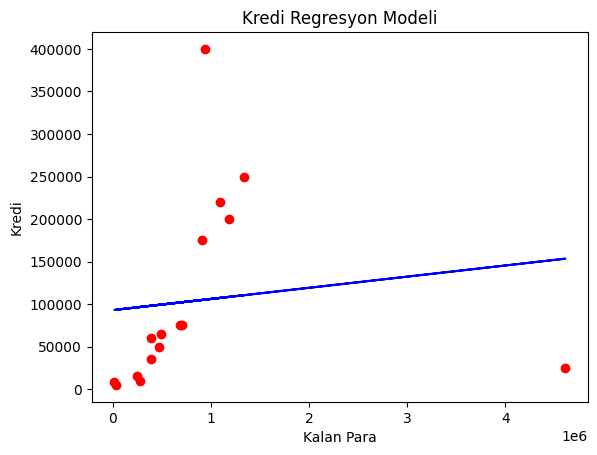

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from google.colab import drive
drive.mount('/content/drive')
veri_yolu = '/content/drive/MyDrive/Colab Notebooks/Advertising.csv'
veri = pd.read_csv(veri_yolu)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

toplam = (veri['Maas'] - (veri['Su'] + veri['Aidat'] + veri['Dogalgaz'] + veri['Elektrik'] + veri ['Kira']))
X = toplam
y = veri['Kredi']
X=np.array(X).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
plt.scatter(X_train, y_train, color = 'red')
plt.title('Kredi Modeli')
plt.xlabel('Kalan Para')
plt.ylabel('Kredi')
plt.show()

y_tahmin = regressor.predict(X_test)
mse = mean_squared_error(y_test,y_tahmin)
print("MSE hata skoru: ",mse)
print("Katsayı: ",regressor.coef_)
print("Kesişim Noktası: ",regressor.intercept_)

plt.scatter(X_train, y_train, color = 'red')
modelin_tahmin_ettigi_y = regressor.predict(X_train)
plt.scatter(X_train, modelin_tahmin_ettigi_y, color = 'blue')
plt.title('Kredi Regresyon Modeli')
plt.xlabel('Kalan Para')
plt.ylabel('Kredi')
plt.show()

plt.scatter(X_train, y_train, color = 'red')
modelin_tahmin_ettigi_y = regressor.predict(X_train)
plt.plot(X_train, modelin_tahmin_ettigi_y, color = 'blue')
plt.title('Kredi Regresyon Modeli')
plt.xlabel('Kalan Para')
plt.ylabel('Kredi')
plt.show()

##Python Kısmı

In [ ]:
import csv

class Musteri():
  def __init__(self,tc,elektrik,dogalgaz,su,kira,aidat,ev,araba,maas,isim,sifre,kredi):
    self.tc = tc
    self.elektrik = elektrik
    self.dogalgaz = dogalgaz
    self.su = su
    self.kira = kira
    self.aidat = aidat
    self.ev = ev
    self.araba = araba
    self.maas = maas
    self.isim = isim
    self.sifre = sifre
    self.kredi = kredi
    self.bakiye = 0


class Banka():
  def __init__(self):
    self.müsteriler = list()
    self.müsteriler.append(Musteri("123","2676","4823","1708","0","1500","2400000","1750000","840000","oguz","213",100000))
    self.müsteriler.append(Musteri("456","3444","4191","1128","121848","2400","0","0","300000","can","123",10000))
    self.müsteriler.append(Musteri("789","1896","4675","2412","182820","1020","0","630000","580000","murat","456",35000))
    self.müsteriler.append(Musteri("147","2220","3987","1692","76956","1920","0","0","335000","hakan","753",15000))
    self.müsteriler.append(Musteri("852","3144","4822","1464","0","1680","3500000","1900000","1200000","ezgi","145",200000))
  def müsteri_ol(self,tc,elektrik,dogalgaz,su,kira,aidat,ev,araba,maas,isim,sifre,kredi):
    self.müsteriler.append(Musteri(tc,elektrik,dogalgaz,su,kira,aidat,ev,araba,maas,isim,sifre,kredi))
    print("Bankamıza kayıt olduğunuz için teşekkür ederiz :)")

banka = Banka()
menü = """

\t Oğuz Bankasına Hoş Geldiniz

1) Müşteriyim
2) Müşteri Olmak İstiyorum
Q) Çıkış

"""
m_menü = """

\tHoş Geldiniz Sayın {}

1) Bakiye Sorgula
2) Para Yatır
3) Para Transfer Et
4) Para Çek
5) Kredi Çek
Q) Çıkış

"""
y_menü = "Ana menüye dönmek için enter'a basınız."


while True:
  print(menü)
  secim = input("Seçiminiz : ")
  if secim=="1":
    girilen_tc = input("TC no giriniz : ")
    tc_no = [a.tc for a in banka.müsteriler]
    if girilen_tc in tc_no:
      for müsteri in banka.müsteriler:
        if girilen_tc == müsteri.tc:
          girilen_sifre = input("Şifre giriniz : ")
          if girilen_sifre ==müsteri.sifre:
            while True:
              print(m_menü.format(müsteri.isim))
              secim2 = input("Seçiminiz : ")
              if secim2=="1":
                print("Bakiyeniz : ",müsteri.bakiye)
                input(y_menü)
              elif secim2=="2":
                yatırılan_tutar = int(input("Miktar : "))
                onay = input("Kendi hesabınıza {} TL para yatırmayı onaylıyor musunuz? (E/H) : ".format(yatırılan_tutar))
                onay = onay.lower()
                if onay =="e":
                  müsteri.bakiye += yatırılan_tutar
                  print("Paranız yatırıldı.")
                  input(y_menü)
                elif onay=="h":
                  print("İşleminiz iptal edildi.")
                  input(y_menü)
                else:
                  print("Hatalı seçim yaptınız.")
                  input(y_menü)
              elif secim2=="3":
                hedef_tc = input("Yatırılacak hesabın TC no : ")
                if hedef_tc in tc_no:
                  for müsteri2 in banka.müsteriler:
                    if hedef_tc == müsteri2.tc:
                      transfer_tutar = int(input("Miktar : "))
                      if transfer_tutar <= müsteri.bakiye:
                        onay = input("{} adlı müşterimize, {} TL tutarında parayı göndermeyi onaylıyor musunuz? (E/H) :".format(müsteri2.isim,transfer_tutar))
                        onay = onay.lower()
                        if onay=="e":
                          müsteri2.bakiye += transfer_tutar
                          müsteri.bakiye -= transfer_tutar
                          print("Paranız yatırıldı.")
                          input(y_menü)
                        elif onay=="h":
                          print("İşlem iptal edildi.")
                          input(y_menü)
                        else:
                          print("Hatalı seçim yaptınız.")
                          input(y_menü)
                      else:
                        print("Bakiyeniz yetersiz!")
                        input(y_menü)
                else:
                  print("Yanlış tc girildi.")
                  input(y_menü)
              elif secim2=="4":
                cekilecek_tutar = int(input("Miktar : "))
                if cekilecek_tutar <= müsteri.bakiye:
                  müsteri.bakiye -= cekilecek_tutar
                  print("İşlem tamamlandı.")
                  input(y_menü)
                else:
                  print("Bakiyeniz yetersiz!")
                  input(y_menü)
              elif secim2=="5":
                  kredi = input("{} adlı müşterimiz, {} TL tutarında kredi çekebilir onaylıyor musunuz? (E/H)".format(müsteri.isim,müsteri.kredi))
                  kredi = kredi.lower()
                  if kredi=="e":
                    müsteri.bakiye += müsteri.kredi
                    print("Krediniz yatırılmıştır.")
                    input(y_menü)
                  elif kredi=="h":
                    print("Krediniz işleminiz iptal edilmiştir.")
                    input(y_menü)
                  else:
                    print("Hatalı seçim yaptınız.")
                    input(y_menü)
              elif secim2=="q" or secim2=="Q":
                print("Çıkış yapılıyor.")
                input(y_menü)
                break
              else:
                input(y_menü)
  elif secim=="2":
    TC = input("TC giriniz : ")
    Elektrik = input("1 yıllık elektrik faturasını giriniz: ")
    Dogalgaz = input("1 yıllık doğalgaz faturasını giriniz:")
    Su = input("1 yıllık su faturasını giriniz: ")
    Kira = input("1 yıllık ev kirasını giriniz: ")
    Aidat = input("1 yıllık aidatı giriniz: ")
    Ev = input("Eviniz varsa değerini giriniz: ")
    Araba = input("Arabanız varsa değerini giriniz: ")
    Maas = input("Maaşınızı giriniz: ")
    i = input("İsim giriniz : ")
    s = input("Şifre giriniz : ")
    print(TC,Elektrik,Dogalgaz,Su,Kira,Aidat,Ev,Araba,Maas,i,s)
    banka.müsteri_ol(TC,Elektrik,Dogalgaz,Su,Kira,Aidat,Ev,Araba,Maas,i,s)
    input(y_menü)
  elif secim=="q" or secim=="Q":
    break
  else:
    input(y_menü)
